<a href="https://colab.research.google.com/github/JuanM-GG/sistemas-dinamicos-Python/blob/main/CHAPTER_5_DP_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [6]:
A = np.matrix([[-2.4047, 0], [5/6, -2.2380]])

In [7]:
eigenval, eigenvec = np.linalg.eig(A)

In [8]:
print(eigenval)

[-2.238  -2.4047]


In [9]:
print(eigenvec)

[[ 0.          0.19615385]
 [ 1.         -0.98057313]]


In [11]:
def model(s, t):

    x1 = s[0]
    x2 = s[1]

    dx1 = -x1
    dx2 = 4*x2

    return [dx1, dx2]

In [47]:
# initial condition 
s1 = [0,1]
s2 = [100,0.00] # any vector with zero in the second element is stable  

In [51]:
# integration time 
t = np.linspace(0,10,100)

In [52]:
out = odeint(model, s2, t)

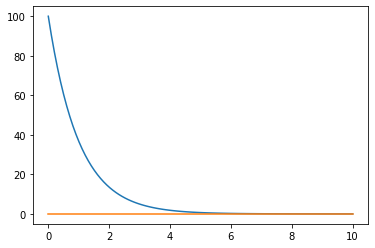

In [53]:
plt.plot(t, out)

In [129]:
def model(s,t, F0):

    h1 = s[0]
    h2 = s[1]

    dh1 = - (h1 - h1s) + 0.5*(F0 - F0s)
    dh2 = 0.2*(h1 - h1s) - 0.1*(h2 - h2s) 

    return [dh1, dh2]

In [130]:
def steady_state(F0):

    h1s = 0.5*F0
    
    h2s = F0

    return [h1s, h2s]

In [131]:
A = np.matrix([[-1, 0],[0.2, -0.1]])

In [132]:
eigenval, eigenvec = np.linalg.eig(A)

In [133]:
print(eigenval)

[-0.1 -1. ]


In [134]:
print(eigenvec)

[[ 0.          0.97618706]
 [ 1.         -0.21693046]]


In [136]:
# inflow rate 
F0s = 0.5 

# steady state
h1s, h2s = steady_state(F0s)

# initial condition 
s = [h1s, h2s]

In [137]:
# integration time 
t = np.linspace(0,10,100)

In [138]:
out = odeint(model, s, t, args=(F0,))

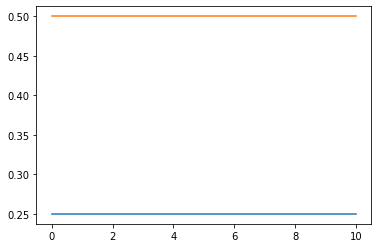

In [139]:
# show results 
plt.plot(t, out)

In [140]:
s1 = np.sum([s, [1,0]], axis=0)
s2 = np.sum([s, [0.9761, -0.2169]], axis=0)

In [141]:
ss = (s1, s2)

In [142]:
out = []

In [143]:
for i in range(len(s)):
    if i == 0:
        out = odeint(model, ss[i], t, args=(F0,))
    else:
        out = np.column_stack((out, odeint(model, ss[i], t, args=(F0,))))

Text(0.5, 1.0, 'Slow')

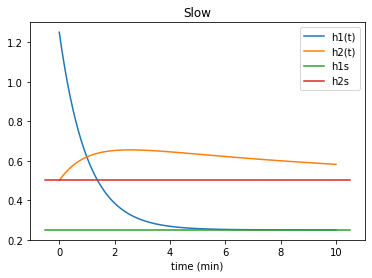

In [149]:
plt.plot(t, out[:,0], t, out[:,1])
plt.plot(plt.xlim(), [h1s, h1s], plt.xlim(), [h2s, h2s])
plt.xlabel("time (min)")
plt.legend(["h1(t)","h2(t)","h1s","h2s"])
plt.title("Slow")

Text(0.5, 1.0, 'Fast')

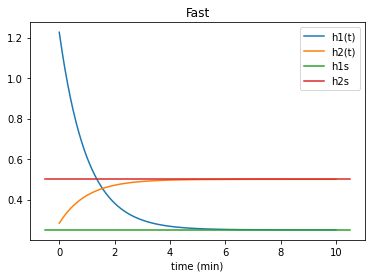

In [150]:
plt.plot(t, out[:,2], t, out[:,3])
plt.plot(plt.xlim(), [h1s, h1s], plt.xlim(), [h2s, h2s])
plt.xlabel("time (min)")
plt.legend(["h1(t)","h2(t)","h1s","h2s"])
plt.title("Fast")

In [151]:
def model(s, t):

    w = s[0]
    z = s[1]

    dw = -1*(z - zs)
    dz = (w - ws)

    return [dw, dz]

In [155]:
ws = 1.0
zs = 1.0
# initial conditions 
s = [1.5-ws, 0.75-zs]

In [156]:
# integration time 
t = np.linspace(0,20,100)

In [157]:
# solve odes 
out = odeint(model, s, t)

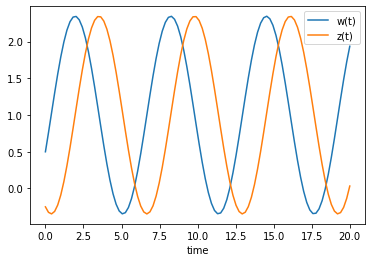

In [160]:
# show results 
plt.plot(t, out)
plt.xlabel("time")
plt.legend(["w(t)","z(t)"])

Period is equal to 2pi

Text(0, 0.5, 'z(t)')

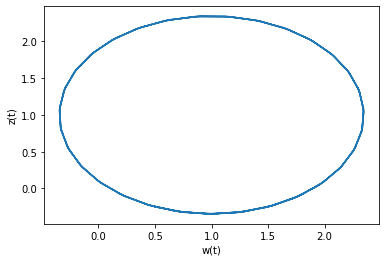

In [162]:
plt.plot(out[:,0],out[:,1])
plt.xlabel("w(t)")
plt.ylabel("z(t)")

In [163]:
import sympy as sp 

In [164]:
x1, x2 = sp.symbols("x1, x2")

In [165]:
eq1 = sp.Eq(1.25*(1.5-x1)/15 + 1.75*(x2 - x1)/15 - 0.10833*x1,0)
eq2 = sp.Eq(1.25*(x1 - x2)/9 + 1.75*(x1 - x2)/9 - 0.33333*x2,0)

In [166]:
sp.solve([eq1, eq2], [x1, x2])

{x1: 0.500007250108043, x2: 0.250004875078397}

In [167]:
A = np.matrix([[-0.30833, 0.11666], [1/3, -0.6666]])

In [168]:
eigenval, eigenvec = np.linalg.eig(A)

In [172]:
print(eigenval)

[-0.22105176 -0.75387824]


In [173]:
print(eigenvec)

[[ 0.80071356 -0.25329599]
 [ 0.59904741  0.96738883]]


In [178]:
ss = [0.5, 0.25]
s1 = np.sum([ss, [0.80, 0.60]], axis= 0) # slow
s2 = np.sum([ss, [-0.2532, 0.9673]], axis= 0) # fast 
s = (s1, s2)

In [196]:
def model(s, t, c0):

    # state variable 
    c1 = s[0]
    c2 = s[1]

    # balances 
    dc1 = -0.30833*(c1 - c1s) + 0.11666*(c2 - c2s) + 0.08333*(c0 - c0s) 

    dc2 = 0.333*(c1 - c1s) - 0.6666*(c2 - c2s) 

    return [dc1, dc2]

In [197]:
# nominal values
c0s = 1.5
c1s = 0.5
c2s = 0.25

In [198]:
# integration time 
t = np.linspace(0,20,100)

In [199]:
# solve ode
out = odeint(model, [c1s, c2s], t, args=(c0s,))

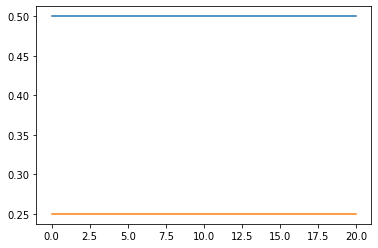

In [200]:
# show results 
plt.plot(t, out)

In [201]:
out = []

In [204]:
for i in range(len(s)):
    if i == 0:
        out = odeint(model, s[i], t, args= (c0s, ))
    else: 
        out = np.column_stack((out, odeint(model, s[i], t, args= (c0s, ))))

Text(0.5, 1.0, 'Slow')

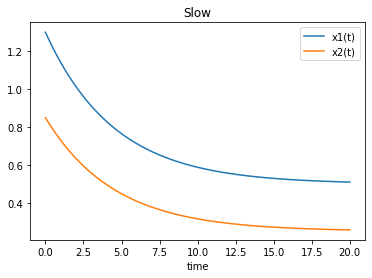

In [206]:
plt.plot(t, out[:,0],t, out[:,1])
plt.xlabel("time")
plt.legend(["x1(t)", "x2(t)"])
plt.title("Slow")

Text(0.5, 1.0, 'Fast')

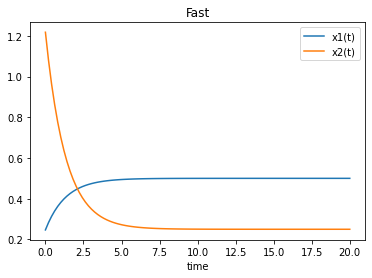

In [207]:
plt.plot(t, out[:,2],t, out[:,3])
plt.xlabel("time")
plt.legend(["x1(t)", "x2(t)"])
plt.title("Fast")

In [208]:
c02 = 1.75

In [211]:
out = odeint(model, [c1s, c2s], t, args= (c02, ))

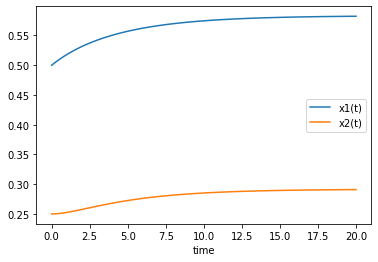

In [213]:
plt.plot(t, out)
plt.xlabel("time")
plt.legend(["x1(t)", "x2(t)"])

If you increase the inflow concentration then the concentration in both tanks in the equilibrium will be greater 

In [214]:
A = np.matrix([[-0.40, 0.30], [3, -4.50]])

In [215]:
eigenval, eigenvec = np.linalg.eig(A)

In [216]:
print(eigenval)

[-0.1911286 -4.7088714]


In [218]:
# nominal values 
Fs = 1; Tis = 50; Ts = 125; Vs = 10; Tjins = 200; Tjs = 150; Vjs = 1; Fjs = 1.5 

In [219]:
# parameters
UA = 183.9; rhocp = 61.3

In [226]:
# establish model 
def heater(s,t,u):

    # state variables 
    T = s[0]
    Tj = s[1]

    # inputs 
    Fj = u[0]
    F = u[1]
    Ti = u[2]
    Tjin = u[3]

    # energy balances 
    dT = -0.40*(T - Ts) + 0.30*(Tj - Tjs) -7.5*(F - Fs) + 0.10*(Ti - Tis)
    dTj = 3*(T - Ts) - 4.50*(Tj - Tjs) + 50*(Fj - Fjs) + 1.5*(Tjin - Tjins)

    return [dT, dTj]

50

In [221]:
# initial conditions 
s = [Ts, Tjs]

In [227]:
# inputs 
u = [Fjs, Fs, Tis, Tjins]

In [228]:
# solve ODEs
out = odeint(heater, s, t, args= (u, ))

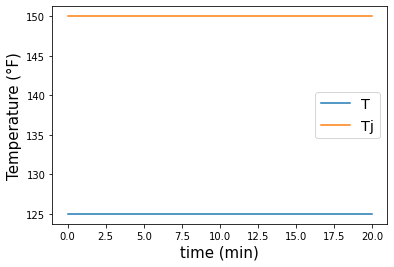

In [232]:
# show results 
plt.plot(t, out)
plt.xlabel("time (min)", size = 15)
plt.ylabel("Temperature (°F)", size = 15)
plt.legend(["T","Tj"], fontsize = "x-large")

In [237]:
# input vector 
Fj = np.ones(len(t))*Fjs
Fj[25:50] = 1.75

In [242]:
# initial conditions 
s = [Ts, Tjs]

# state vectors 
T = np.ones(len(t))*Ts
Tj = np.ones(len(t))*Tjs

# for cycle to change Fj 
for i in range(len(t)-1):

    # update time span 
    ts = [t[i], t[i+1]]

    # update input
    u[0] = Fj[i+1]

    # solve ODEs 
    out = odeint(heater, s, ts, args= (u, ))

    # save states 
    T[i+1] = out[-1][0]
    Tj[i+1] = out[-1][1]

    # update initial conditions 
    s = out[-1]

Text(0, 0.5, 'Fj (L/min)')

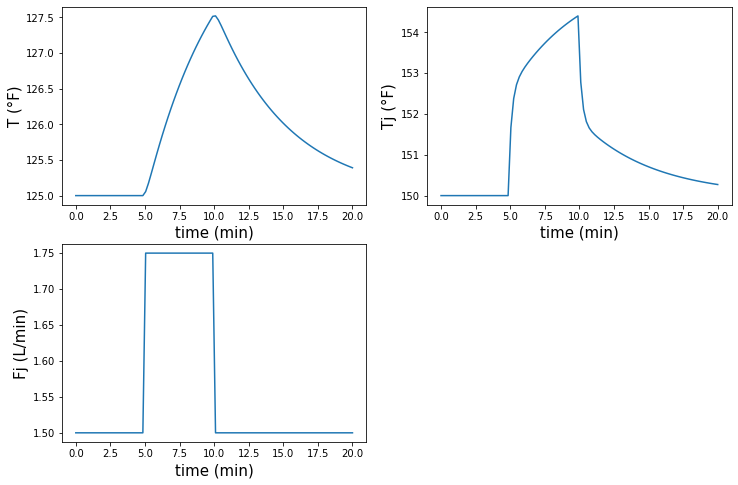

In [244]:
plt.figure(figsize = (12,8))
plt.subplot(2,2,1)
plt.plot(t, T)
plt.xlabel("time (min)", size = 15)
plt.ylabel("T (°F)", size = 15)
plt.subplot(2,2,2)
plt.plot(t, Tj)
plt.xlabel("time (min)", size = 15)
plt.ylabel("Tj (°F)", size = 15)
plt.subplot(2,2,3)
plt.plot(t, Fj)
plt.xlabel("time (min)", size = 15)
plt.ylabel("Fj (L/min)", size = 15)